In [59]:
# 📦 Imports
import os
import json
import ast
import cv2
import numpy as np
import pandas as pd
import numbers
import matplotlib.pyplot as plt
from IPython.display import display


In [60]:
# Parameters (Set your inputs here)
metadata_path = "/fs/ess/PAS2136/ggr_data/results/GGR2020_subset/image_data.json"
annots_path = "/fs/ess/PAS2136/ggr_data/results/GGR2020_subset/ca_classifier/final_output_with_softmax_and_census.csv"
output_dir = "./annotated_images"

filter_species = ["grevy's zebra"]           # set to None to ignore species
# min_CA_score = 0.5                           # set to None to skip min filter
min_CA_score = None
# max_CA_score = 1.0                           # set to None to skip max filter
max_CA_score = None
viewpoints = ["right"]              # partial match, set to None to skip
# viewpoints = None
filter_annotations_census = True            # True / False / None to ignore
num_images = 20
output_dir = "results/grevys_zebra_right"

columns_to_display = [
    # "uri",
    # "image_uuid",
    # "uuid",
    # "file_name",
    "confidence",
    # "detection_class",
    # "tracking_id",
    # "timestamp",
    "species",
    # "category_id",
    # "bbox",
    "viewpoint",
    "CA_score",
    "annotations_census",
    # "individual_id"
]


In [61]:
# 📂 Load Metadata
with open(metadata_path, 'r') as file:
    metadata = json.load(file)

if video_mode:
    image_metadata = []
    [image_metadata.extend(video["frame data"]) for video in metadata["videos"]]
else:
    image_metadata = metadata["images"]

images = []
uri_uuid_mapping = {}
for image in image_metadata:
    images.append(image["uri_original"])
    uri_uuid_mapping[image["uri_original"]] = image["uuid"]


In [62]:
# 📑 Load annotation data
images_df = pd.DataFrame(images, columns=["uri"])
images_df["image_uuid"] = images_df["uri"].map(uri_uuid_mapping)

annot_df = pd.read_csv(annots_path)

df = pd.merge(images_df, annot_df, on="image_uuid", how="inner")

# 🎨 Set annotation keys to display
keys = [k for k, v in display_fields.items() if v]

def format_annotation(row):
    format_str = ""
    for key in keys:
        if key in row and row[key] and not (isinstance(row[key], numbers.Number) and np.isnan(row[key])):
            format_str += f"{key} {row[key]} "
    return format_str


In [63]:
# 🖍️ Create output directory
# os.makedirs(output_dir, exist_ok=True)

print("Columns in df:")
for col in df.columns:
    print(f"- {col}")


# Count number of annotations per species
species_counts = df['species'].value_counts()

print("--------------------------------------")

print("Species Annotation Statistics:")
for species, count in species_counts.items():
    print(f"- {species}: {count} rows")


Columns in df:
- uri
- image_uuid
- uuid
- file_name
- confidence
- detection_class
- tracking_id
- timestamp
- species
- category_id
- bbox
- viewpoint
- CA_score
- annotations_census
- individual_id
--------------------------------------
Species Annotation Statistics:
- grevy's zebra: 2498 rows
- plains zebra: 196 rows


In [64]:
filtered_df = df.copy()

# Filter by species
if filter_species is not None:
    filtered_df = filtered_df[filtered_df['species'].isin(filter_species)]

# 📉 Filter by CA_score range
if min_CA_score is not None:
    filtered_df = filtered_df[filtered_df['CA_score'] >= min_CA_score]

if max_CA_score is not None:
    filtered_df = filtered_df[filtered_df['CA_score'] <= max_CA_score]

# 👁️ Filter by partial viewpoint match
if viewpoints is not None:
    pattern = '|'.join(viewpoints)  # builds regex like "left|right"
    filtered_df = filtered_df[filtered_df['viewpoint'].astype(str).str.contains(pattern, case=False, na=False)]

# ✅ Filter by annotations_census
if filter_annotations_census is not None:
    filtered_df = filtered_df[filtered_df['annotations_census'] == filter_annotations_census]

# 📊 Show result summary
print(f"Filtered rows: {len(filtered_df)} out of {len(df)}")
print("Species Annotation Statistics:")
species_counts = filtered_df['species'].value_counts()

for species, count in species_counts.items():
    print(f"- {species}: {count} rows")


print("Viewpoint Annotation Statistics:")
viewpoints_counts = filtered_df['viewpoint'].value_counts()

for vp, count in viewpoints_counts.items():
    print(f"- {vp}: {count} rows")


Filtered rows: 948 out of 2694
Species Annotation Statistics:
- grevy's zebra: 948 rows
Viewpoint Annotation Statistics:
- right: 590 rows
- backright: 188 rows
- frontright: 170 rows


In [65]:
if len(filtered_df) == 0:
    print("⚠️ No rows available in filtered_df after filtering.")
elif len(filtered_df) < num_images:
    print(f"⚠️ Only {len(filtered_df)} rows available, returning all.")
    sampled_rows = filtered_df.copy()
else:
    sampled_rows = filtered_df.sample(n=num_images, random_state=42)

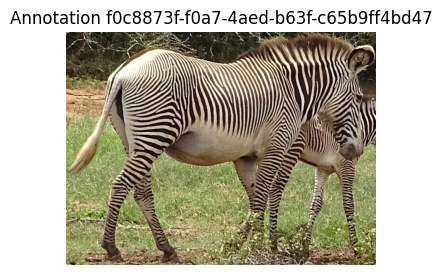

  confidence: 0.9498024582862854
  species: grevy's zebra
  viewpoint: backright
  CA_score: 0.94326174
  annotations_census: True
------------------------------------------------


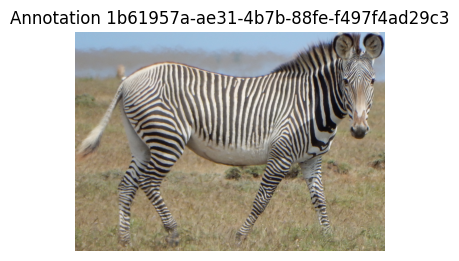

  confidence: 0.9682096242904664
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.9381072
  annotations_census: True
------------------------------------------------


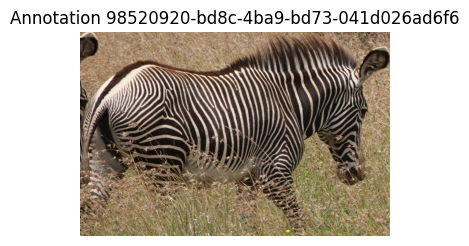

  confidence: 0.9305340647697448
  species: grevy's zebra
  viewpoint: backright
  CA_score: 0.57073927
  annotations_census: True
------------------------------------------------


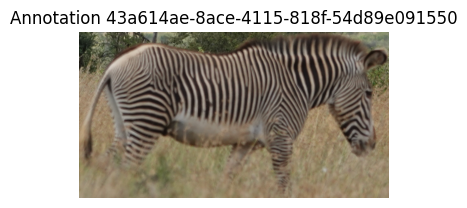

  confidence: 0.9407058358192444
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.8503221
  annotations_census: True
------------------------------------------------


  confidence: 0.9495559334754944
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.9895018
  annotations_census: True
------------------------------------------------


  confidence: 0.9506516456604004
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.92567176
  annotations_census: True
------------------------------------------------


  confidence: 0.9572510123252868
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.99048644
  annotations_census: True
------------------------------------------------


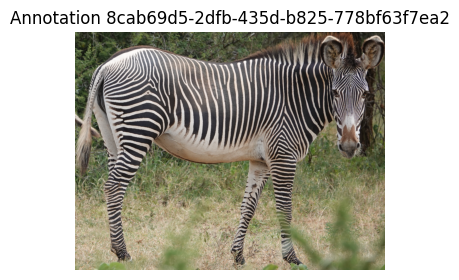

  confidence: 0.9640339612960817
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.9907024
  annotations_census: True
------------------------------------------------


  confidence: 0.9605778455734252
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.89971036
  annotations_census: True
------------------------------------------------


  confidence: 0.9345661997795104
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.9267549
  annotations_census: True
------------------------------------------------


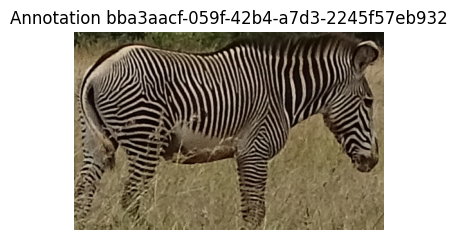

  confidence: 0.8875457048416138
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.8368107
  annotations_census: True
------------------------------------------------


  confidence: 0.943751096725464
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.88232994
  annotations_census: True
------------------------------------------------


  confidence: 0.908702790737152
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.3768188
  annotations_census: True
------------------------------------------------


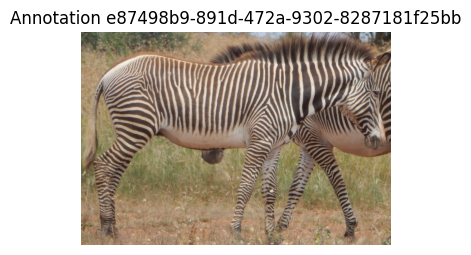

  confidence: 0.954374372959137
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.75586426
  annotations_census: True
------------------------------------------------


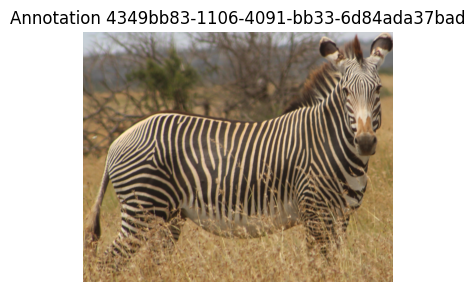

  confidence: 0.9556779861450196
  species: grevy's zebra
  viewpoint: frontright
  CA_score: 0.8127109
  annotations_census: True
------------------------------------------------


  confidence: 0.9438589811325072
  species: grevy's zebra
  viewpoint: backright
  CA_score: 0.68694556
  annotations_census: True
------------------------------------------------


  confidence: 0.8627761006355286
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.9311887
  annotations_census: True
------------------------------------------------


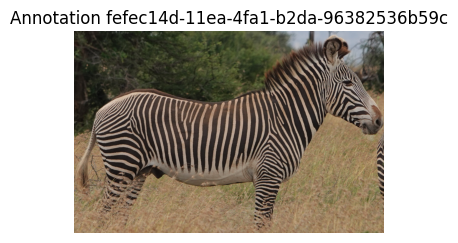

  confidence: 0.9481468796730042
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.7778297
  annotations_census: True
------------------------------------------------


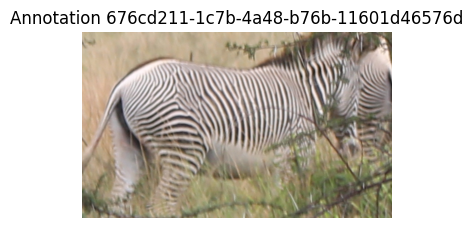

  confidence: 0.8376638889312744
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.40179908
  annotations_census: True
------------------------------------------------


  confidence: 0.943064510822296
  species: grevy's zebra
  viewpoint: backright
  CA_score: 0.7738186
  annotations_census: True
------------------------------------------------


In [66]:
# 🔍 Set number of annotations to show (cropped bboxes)

# 🖼️ Display n cropped bounding boxes with full annotation info



for _, row in sampled_rows.iterrows():

    img = cv2.imread(row['uri'])
    if img is None:
        print(f"❌ Could not load image: {row['uri']}")
        continue

    # Parse bounding box and crop
    bbox = np.array(ast.literal_eval(row["bbox"])).astype(int)
    x1, y1, w, h = bbox
    x2, y2 = x1 + w, y1 + h

    # Ensure crop stays within image bounds
    h_img, w_img = img.shape[:2]
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w_img, x2), min(h_img, y2)

    cropped = img[y1:y2, x1:x2]
    if cropped.size == 0:
        print(f"⚠️ Skipping empty crop in image: {row['uri']}")
        continue

    # Convert to RGB and display
    cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 4))
    plt.imshow(cropped_rgb)
    plt.axis("off")
    plt.title(f"Annotation {row['uuid']}")
    plt.show()

    # Print all annotation fields
    for col in columns_to_display:
        print(f"  {col}: {row[col]}")

    print("------------------------------------------------")
    


In [67]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 📂 Output directory for combined image + text

os.makedirs(output_dir, exist_ok=True)

# 📄 Columns to include in printed text


# 🔍 Process each sampled annotation
for _, row in sampled_rows.iterrows():
    img = cv2.imread(row['uri'])
    if img is None:
        print(f"❌ Could not load image: {row['uri']}")
        continue

    # Parse and crop bbox
    bbox = np.array(ast.literal_eval(row["bbox"])).astype(int)
    x1, y1, w, h = bbox
    x2, y2 = x1 + w, y1 + h

    h_img, w_img = img.shape[:2]
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w_img, x2), min(h_img, y2)

    cropped = img[y1:y2, x1:x2]
    if cropped.size == 0:
        print(f"⚠️ Skipping empty crop in image: {row['uri']}")
        continue

    # Convert to RGB for matplotlib
    cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

    # 📊 Create the figure with side-by-side layout
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(cropped_rgb)
    ax.axis("off")

    # 📋 Create annotation text
    annotation_lines = [f"{col}: {row[col]}" for col in columns_to_display]
    annotation_text = "\n".join(annotation_lines)

    # 🧾 Add annotation as a text box
    plt.text(1.05, 0.5, annotation_text,
             transform=ax.transAxes,
             fontsize=10,
             verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

    # 💾 Save figure
    out_path = os.path.join(output_dir, f"{row['uuid']}.jpg")
    plt.savefig(out_path, bbox_inches='tight')
    plt.close()
    print(f"✅ Saved image with annotation: {out_path}")

✅ Saved image with annotation: results/grevys_zebra_right/f0c8873f-f0a7-4aed-b63f-c65b9ff4bd47.jpg
✅ Saved image with annotation: results/grevys_zebra_right/1b61957a-ae31-4b7b-88fe-f497f4ad29c3.jpg
✅ Saved image with annotation: results/grevys_zebra_right/98520920-bd8c-4ba9-bd73-041d026ad6f6.jpg
✅ Saved image with annotation: results/grevys_zebra_right/43a614ae-8ace-4115-818f-54d89e091550.jpg
✅ Saved image with annotation: results/grevys_zebra_right/7578698a-0a68-4266-9143-63a2fcb876bf.jpg
✅ Saved image with annotation: results/grevys_zebra_right/f52382e8-ae61-42d6-838c-65828e6c90e9.jpg
✅ Saved image with annotation: results/grevys_zebra_right/4ff631c0-4ae5-484f-a807-bb3eb8c0c1e3.jpg
✅ Saved image with annotation: results/grevys_zebra_right/8cab69d5-2dfb-435d-b825-778bf63f7ea2.jpg
✅ Saved image with annotation: results/grevys_zebra_right/c570e00b-81a6-48bc-94e1-745066a7ae38.jpg
✅ Saved image with annotation: results/grevys_zebra_right/0cfb5744-c2e1-4b90-b957-6425216f4a19.jpg
✅ Saved im